In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [8]:
# Define the stock universe (S&P 500 stocks)
stock_symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JPM", "PG", "KO", "INTC", "CSCO"]

# Define the date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-16"


In [9]:
# Download historical stock price data
stock_data = yf.download(stock_symbols, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  10 of 10 completed


In [10]:
# Calculate the historical volatility for each stock
volatility = stock_data.pct_change().rolling(30).std()  # 30-day rolling standard deviation

# Select the top 5 stocks with the lowest volatility
low_volatility_stocks = volatility.mean().nsmallest(5).index

# Create a smart beta portfolio with equal-weighted low-volatility stocks
smart_beta_portfolio = stock_data[low_volatility_stocks].mean(axis=1)

# Calculate returns for the S&P 500 index (as a proxy for the market)
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
market_returns = market_data.pct_change()

[*********************100%%**********************]  1 of 1 completed


In [11]:
smart_beta_portfolio

Date
2023-01-03    102.504559
2023-01-04    103.127900
2023-01-05    102.212437
2023-01-06    104.854107
2023-01-09    104.375605
                 ...    
2023-10-09    114.784002
2023-10-10    115.343998
2023-10-11    115.263999
2023-10-12    115.300002
2023-10-13    115.640002
Length: 197, dtype: float64

In [13]:
low_volatility_stocks

Index(['KO', 'PG', 'CSCO', 'AAPL', 'JPM'], dtype='object')

In [15]:
volatility.dropna()

,AAPL,AMZN,CSCO,GOOGL,INTC,JPM,KO,MSFT,PG,TSLA
Date,,,,,,,,,,
2023-02-15,0.014632,0.029619,0.012616,0.029824,0.024724,0.011487,0.010147,0.021731,0.010408,0.041914
2023-02-16,0.014976,0.030232,0.015755,0.029882,0.024379,0.011776,0.010176,0.020625,0.010491,0.044077
2023-02-17,0.014864,0.029876,0.015501,0.029669,0.024698,0.011773,0.010478,0.019966,0.011223,0.043113
2023-02-21,0.014966,0.029897,0.015172,0.030122,0.025505,0.011850,0.009768,0.020482,0.010108,0.045218
2023-02-22,0.014970,0.029872,0.015230,0.030109,0.025389,0.011915,0.009598,0.020514,0.010032,0.044594
...,...,...,...,...,...,...,...,...,...,...
2023-10-09,0.014274,0.019480,0.010137,0.013866,0.018264,0.008785,0.011039,0.013212,0.007397,0.032763
2023-10-10,0.014192,0.019576,0.009968,0.013837,0.018251,0.008836,0.011951,0.013241,0.007696,0.032830
2023-10-11,0.013664,0.019715,0.009877,0.013352,0.018038,0.008725,0.011950,0.013165,0.007905,0.029796


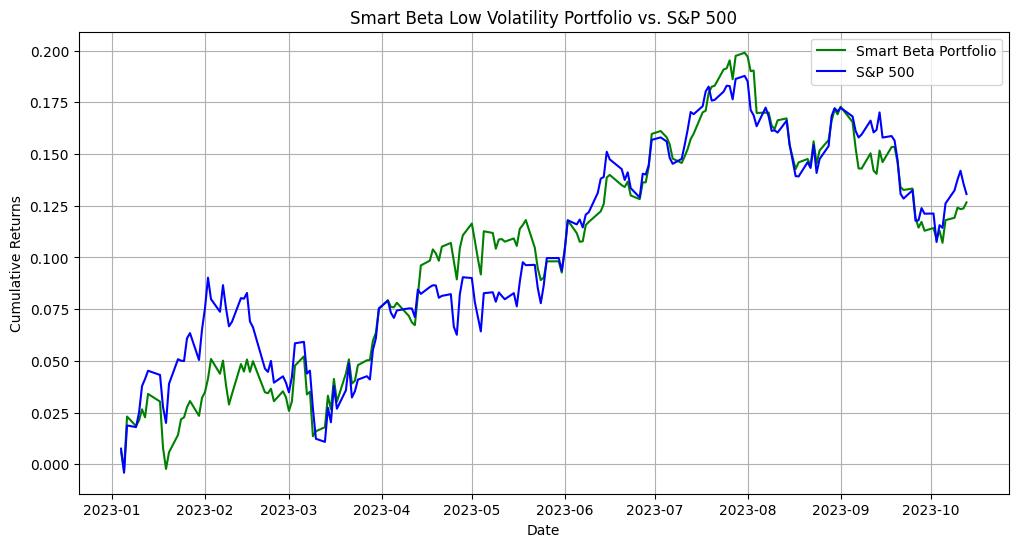

In [12]:
# Plot the performance of the smart beta portfolio and the market
plt.figure(figsize=(12, 6))
plt.plot(smart_beta_portfolio.pct_change().cumsum(), label='Smart Beta Portfolio', color='green')
plt.plot(market_returns.cumsum(), label='S&P 500', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Smart Beta Low Volatility Portfolio vs. S&P 500')
plt.legend()
plt.grid(True)
plt.show()